In [1]:
import os
for dirname, _, filenames in os.walk('kaggle\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle\input\house-prices-advanced-regression-techniques\data_description.txt
kaggle\input\house-prices-advanced-regression-techniques\sample_submission.csv
kaggle\input\house-prices-advanced-regression-techniques\test.csv
kaggle\input\house-prices-advanced-regression-techniques\train.csv


In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
%matplotlib inline

In [3]:
df_train = pd.read_csv("kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\danie\anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


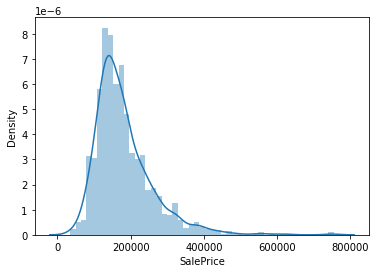

In [4]:
sns.distplot(df_train['SalePrice']);

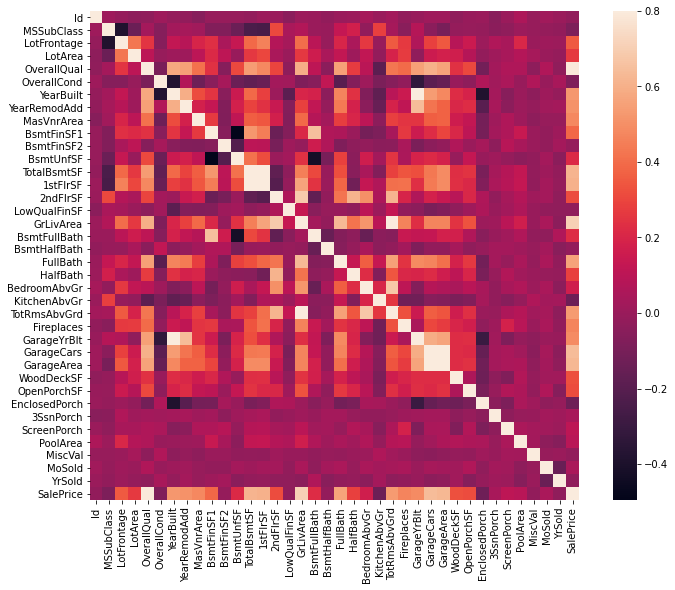

In [5]:
corrmat = df_train.corr()
figure, axis = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

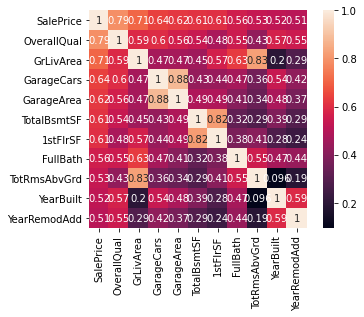

In [6]:
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm, annot=True, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
df_train = df_train[cols]
print(df_train.head())

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
0       856         2             8       2003          2003  
1      1262         2             6       1976          1976  
2       920         2             6       2001          2002  
3       961         1             7       1915          1970  
4      1145         2             9       2000          2000  


In [8]:
print(df_train.isnull().sum().sort_values(ascending=False))

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64


In [9]:
X_train = df_train[cols].drop(["SalePrice"], axis=1)
y_train = df_train.SalePrice

print(X_train, '\n')
print(y_train, '\n')

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               7       1710           2         548          856       856   
1               6       1262           2         460         1262      1262   
2               7       1786           2         608          920       920   
3               7       1717           3         642          756       961   
4               8       2198           3         836         1145      1145   
...           ...        ...         ...         ...          ...       ...   
1455            6       1647           2         460          953       953   
1456            6       2073           2         500         1542      2073   
1457            7       2340           1         252         1152      1188   
1458            5       1078           1         240         1078      1078   
1459            5       1256           1         276         1256      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodA

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print(X_train.shape, '\n')

(1460, 10) 



In [11]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=3, learning_rate=0.1)
model_xgb.fit(X_train, y_train)

xgb_preds_train = model_xgb.predict(X_train)
print("Predictions: ", xgb_preds_train)
print("Score on training set: ", mean_squared_log_error(y_train, xgb_preds_train))

Predictions:  [196372.19 166803.53 212984.83 ... 269117.7  132047.67 147256.5 ]
Score on training set:  0.007542857811058266


In [12]:
df_test_withid = pd.read_csv("kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test = df_test_withid[cols[1:]]

df_test = df_test.fillna(df_test.mean())
X_test = df_test
print(X_test.shape, '\n')
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

(1459, 10) 



In [13]:
xgb_preds_test = model_xgb.predict(X_test)
solution = pd.DataFrame({"id":df_test_withid.Id, "SalePrice":xgb_preds_test})
solution.to_csv("submissions\submission.csv", index = False)